In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame

In [2]:
census = pd.read_csv("census.csv")

The above data set is a cleaned census extract pulled from the UCI Machine Learning repository. You can find out more about the data set here: http://archive.ics.uci.edu/ml/datasets/Census+Income

We will perform some relatively simple analysis like the one we performed this week.

In [3]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,59,Private,307423,9th,5,Never-married,Other-service,Not-in-family,Black,Male,0,0,50,United-States,0
1,32,Private,192965,HS-grad,9,Separated,Sales,Not-in-family,White,Female,0,0,45,United-States,0
2,19,Private,125591,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
3,51,Without-pay,124963,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,0
4,57,Self-emp-inc,146103,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,15024,0,30,United-States,1


First plot a histogram of the ages in the data set.

<class 'pandas.core.frame.DataFrame'>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000768D3C8>]], dtype=object)

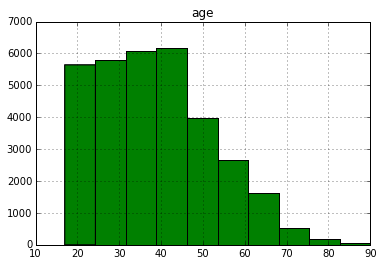

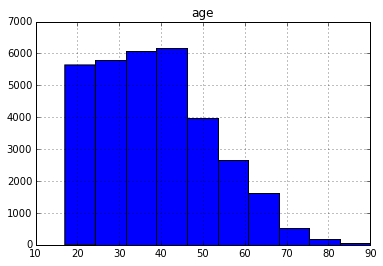

In [4]:
print(type(census))
census.hist(column='age')
census.age.hist()
census.hist("age")

Now plot a histogram of the number of years of education. This is the `education-num` column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000074E1AC8>]], dtype=object)

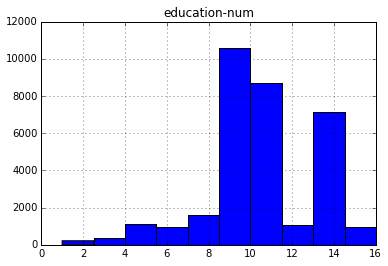

In [5]:
#census.hist(column='education-num')
census.hist("education-num")

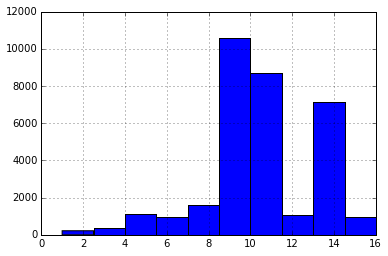

In [6]:
census['education-num'].hist()

Now plot a horizontal bar plot of the counts of marital status.

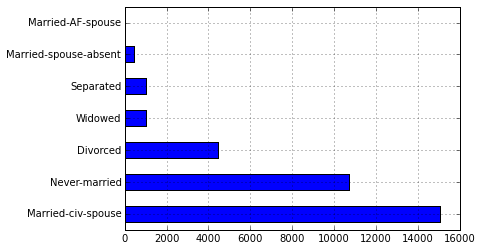

In [7]:
census['marital-status'].value_counts().plot(kind='barh')

#mscount = census.groupby('marital-status')
#mscount.count().plot(kind = 'barh')

What is the average age of the divorced group? The standard deviation? The min? The max? The interquartile range?

In [8]:
census['marital-status'].unique()

array(['Never-married', 'Separated', 'Married-civ-spouse', 'Divorced',
       'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'], dtype=object)

In [12]:
#census[census['marital-status'] == 'Divorced']['age'].describe()
print(census[census["marital-status"]=="Divorced"].age.describe())

#ms_count.get_group('Divorced').describe()

count    4443.000000
mean       43.277965
std        10.537445
min        19.000000
25%        36.000000
50%        43.000000
75%        50.000000
max        90.000000
Name: age, dtype: float64


What is the average age of the Never-married group? The standard deviation? The min? The max? The interquartile range?

In [13]:
print(census[census["marital-status"]=="Never-married"].age.describe())
#mscount.get_group('Never-married').describe()

count    10733.000000
mean        28.062517
std          9.860521
min         17.000000
25%         21.000000
50%         25.000000
75%         32.000000
max         90.000000
Name: age, dtype: float64


NameError: name 'mscount' is not defined

How many different distinct occupations are there in the data set?

In [14]:
print(len(census['occupation'].unique()))

census['occupation'].unique()


15


array(['Other-service', 'Sales', 'Exec-managerial', 'Farming-fishing',
       'Prof-specialty', 'Tech-support', 'Adm-clerical',
       'Transport-moving', 'Machine-op-inspct', '?', 'Craft-repair',
       'Handlers-cleaners', 'Protective-serv', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

What is the average age for each occupation?

In [15]:
print(census.groupby(['occupation']).mean().age)


ocgroup = census.groupby('occupation')
ocgroup
ocgroup.mean().age

occupation
?                    39.772267
Adm-clerical         37.343148
Armed-Forces         30.583333
Craft-repair         38.966005
Exec-managerial      42.313888
Farming-fishing      41.182347
Handlers-cleaners    32.415040
Machine-op-inspct    37.710194
Other-service        35.128614
Priv-house-serv      42.182927
Prof-specialty       40.519697
Protective-serv      38.500000
Sales                37.702406
Tech-support         37.375130
Transport-moving     40.855330
Name: age, dtype: float64


occupation
?                    39.772267
Adm-clerical         37.343148
Armed-Forces         30.583333
Craft-repair         38.966005
Exec-managerial      42.313888
Farming-fishing      41.182347
Handlers-cleaners    32.415040
Machine-op-inspct    37.710194
Other-service        35.128614
Priv-house-serv      42.182927
Prof-specialty       40.519697
Protective-serv      38.500000
Sales                37.702406
Tech-support         37.375130
Transport-moving     40.855330
Name: age, dtype: float64

For the farm-fishing occupation, plot a histogram of the capital gains.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A848AC8>]], dtype=object)

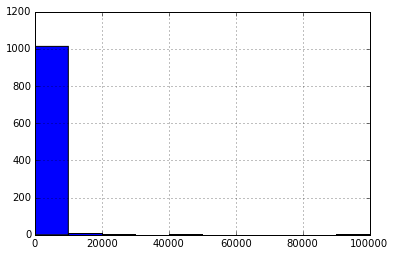

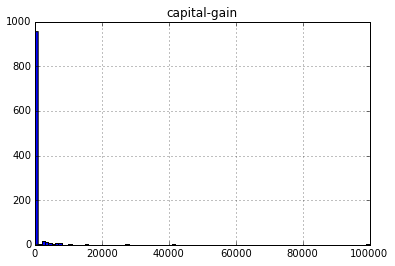

In [16]:
census[census["occupation"]=="Farming-fishing"]["capital-gain"].hist()

ocgroup.get_group('Farming-fishing').hist('capital-gain', bins = 100)

Plot the average and maximum capital loss for each grouping of `hours-per-week`.

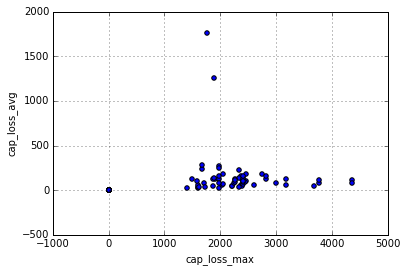

In [17]:
data = census.groupby(["hours-per-week"])["capital-loss"]
data_max = data.max()
data_avg = data.mean()
new_data = pd.DataFrame(index = data_max.index)
new_data['cap_loss_max'] = data_max
new_data['cap_loss_avg'] = data_avg
new_data.plot(x = "cap_loss_max", y = "cap_loss_avg", kind = 'scatter')


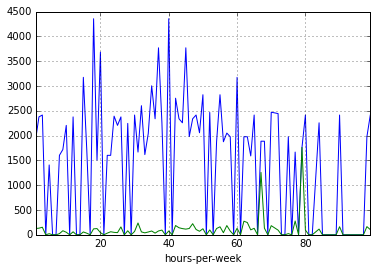

In [18]:
hpw = census.groupby('hours-per-week')
hpw
hpw.describe()
hpw['capital-loss'].max().plot()
hpw['capital-loss'].mean().plot()

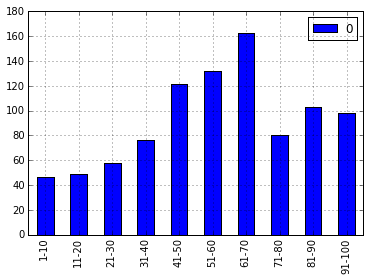

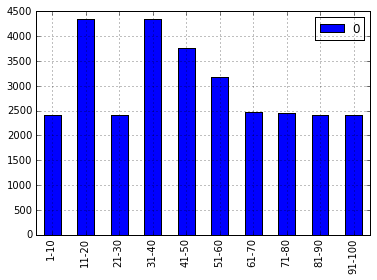

In [19]:
#added after class by Scott - don't blame Aaron and Kent if this is a terrible method :)

avg_capital_loss = []
max_capital_loss = []
for i in range(1,101,10):
    avg_capital_loss.append(round(census[(i <= census['hours-per-week']) & (census['hours-per-week'] < i + 10)]['capital-loss'].mean(),2))
    max_capital_loss.append(census[(i <= census['hours-per-week']) & (census['hours-per-week'] < i + 10)]['capital-loss'].max())

avgdf = pd.DataFrame(avg_capital_loss)
maxdf = pd.DataFrame(max_capital_loss)
    
avgdf.index = ['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
maxdf.index = ['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']

avgdf.plot(kind='bar')
#plt.xlabel("hours grouping", size=16)
#plt.ylabel("average capital loss", size=16)

maxdf.plot(kind='bar')
#plt.xlabel("hours grouping", size=16)
#plt.ylabel("max capital loss", size=16)

In [20]:
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)

3.3.5 |Anaconda 2.2.0 (64-bit)| (default, Jan  9 2015, 10:41:35) [MSC v.1600 64 bit (AMD64)]
1.9.2
0.15.2


In [21]:
pd.Index

pandas.core.index.Index

In [23]:
pd.Series

pandas.core.series.Series

In [24]:
series_ex = pd.Series(['a','b','c'])
series_ex

0    a
1    b
2    c
dtype: object

In [25]:
series_ex.index

Int64Index([0, 1, 2], dtype='int64')

In [26]:
series_ex.values

array(['a', 'b', 'c'], dtype=object)

In [27]:
series_ex = pd.Series(np.arange(26))
series_ex

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
dtype: int32

In [29]:
import string #python standard library

In [31]:
lc = string.ascii_lowercase
uc = string.ascii_uppercase
print(lc,uc)

abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ


In [33]:
print(list(lc))
series_ex.index=list(lc)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [34]:
series_ex

a     0
b     1
c     2
d     3
e     4
f     5
g     6
h     7
i     8
j     9
k    10
l    11
m    12
n    13
o    14
p    15
q    16
r    17
s    18
t    19
u    20
v    21
w    22
x    23
y    24
z    25
dtype: int32

In [36]:
series_ex.ix['p':'z']

p    15
q    16
r    17
s    18
t    19
u    20
v    21
w    22
x    23
y    24
z    25
dtype: int32

In [37]:
series_ex['c']

2

In [38]:
pd.DataFrame

pandas.core.frame.DataFrame

In [39]:
letters = pd.DataFrame([list(lc),list(uc),list(range(26))])
letters

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
1,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
2,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25


In [43]:
letters.transpose()

,0,1,2
0,a,A,0
1,b,B,1
2,c,C,2
3,d,D,3
4,e,E,4
5,f,F,5
6,g,G,6
7,h,H,7
8,i,I,8
9,j,J,9


In [48]:
letters = letters.transpose()


In [49]:
letters.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype='int64')

In [53]:
letters.columns


Index(['lowercase', 'uppercase', 'number'], dtype='object')

In [52]:
letters.columns = ['lowercase','uppercase','number']

In [54]:
letters.head()

,lowercase,uppercase,number
0,a,A,0
1,b,B,1
2,c,C,2
3,d,D,3
4,e,E,4


In [55]:
letters.lowercase

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
20    u
21    v
22    w
23    x
24    y
25    z
Name: lowercase, dtype: object

In [56]:
letters['lowercase']

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
20    u
21    v
22    w
23    x
24    y
25    z
Name: lowercase, dtype: object

In [57]:
type(letters.lowercase)

pandas.core.series.Series

In [58]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

3.3.5 |Anaconda 2.2.0 (64-bit)| (default, Jan  9 2015, 10:41:35) [MSC v.1600 64 bit (AMD64)]
1.9.2
0.15.2


In [60]:
np.random.seed(125)
raw_np_array = np.random.random_integers(1,20,26)

data = pd.Series.from_array(raw_np_array)

In [61]:
pd.Series(raw_np_array)

0      3
1      4
2     15
3     14
4     12
5      1
6      6
7      3
8     14
9      1
10    19
11    13
12     1
13     3
14    10
15     4
16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int32

In [62]:

pd.Series(['h',1,1.0])

0    h
1    1
2    1
dtype: object

In [63]:
pd.Series([1.0,1,2])

0    1
1    1
2    2
dtype: float64

In [64]:
pd.Series([1.0,1,2], dtype=np.float16)

0    1
1    1
2    2
dtype: float16

In [65]:
pd.Series(list(range(5)),index=list('abcde'))

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [66]:
data

0      3
1      4
2     15
3     14
4     12
5      1
6      6
7      3
8     14
9      1
10    19
11    13
12     1
13     3
14    10
15     4
16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int32

In [69]:

data.shape

(26,)

In [70]:
len(data)

26

In [72]:
print(data.head())
print(data.tail())
data.head(2)

0     3
1     4
2    15
3    14
4    12
dtype: int32
21    10
22    18
23     5
24     5
25    12
dtype: int32


0    3
1    4
dtype: int32

In [73]:

data.mean()

8.9615384615384617

In [74]:

data.mode()

0     1
1     3
2    10
3    13
dtype: int32

In [75]:

data.median()

10.0

In [78]:
data.count()

26

In [79]:
data.unique()

array([ 3,  4, 15, 14, 12,  1,  6, 19, 13, 10, 16,  8, 18,  5], dtype=int64)

In [82]:

data.value_counts()

13    3
10    3
3     3
1     3
14    2
12    2
5     2
4     2
19    1
18    1
16    1
15    1
8     1
6     1
dtype: int64

In [83]:
data.describe()

count    26.000000
mean      8.961538
std       5.574806
min       1.000000
25%       4.000000
50%      10.000000
75%      13.000000
max      19.000000
dtype: float64

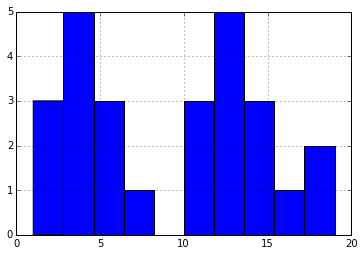

In [84]:
data.hist()

In [85]:
r_data = data.copy()
r_data.index = reversed(range(26))
r_data

25     3
24     4
23    15
22    14
21    12
20     1
19     6
18     3
17    14
16     1
15    19
14    13
13     1
12     3
11    10
10     4
9     13
8     16
7     13
6      8
5     10
4     10
3     18
2      5
1      5
0     12
dtype: int32

In [86]:
data[20]

10

In [90]:
r_data[20]

1

In [91]:

data[[10,20]]


10    19
20    10
dtype: int32

In [92]:
r_data[[10,20]]

10    4
20    1
dtype: int32

In [93]:
d2 = data.copy() 
# copy creates a copy of the data so we don't modify the original one

In [94]:
import string

In [95]:
d2.index = list(string.ascii_uppercase)
d2.head()

A     3
B     4
C    15
D    14
E    12
dtype: int32

In [96]:
d2[4]

12

In [97]:

d2['E']

12

In [98]:
d2[[0,4]]

A     3
E    12
dtype: int32

In [99]:
d2[0:4]

A     3
B     4
C    15
D    14
dtype: int32

In [100]:
d2[['A','D']]

A     3
D    14
dtype: int32

In [101]:
data

0      3
1      4
2     15
3     14
4     12
5      1
6      6
7      3
8     14
9      1
10    19
11    13
12     1
13     3
14    10
15     4
16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int32

In [102]:
d3 = data[5:10]
d3

5     1
6     6
7     3
8    14
9     1
dtype: int32

In [103]:

d3[5]

1

In [107]:

d3[0]

KeyError: 0

In [106]:
d3.iget(0)

1

In [108]:
d3.iget([0,3])

5     1
8    14
dtype: int32

In [109]:
d3

5     1
6     6
7     3
8    14
9     1
dtype: int32

In [110]:
d3.iloc[[0,3]]

5     1
8    14
dtype: int32

In [111]:
d3.ix[[0,7,12]]

0    NaN
7      3
12   NaN
dtype: float64

In [112]:

data

0      3
1      4
2     15
3     14
4     12
5      1
6      6
7      3
8     14
9      1
10    19
11    13
12     1
13     3
14    10
15     4
16    13
17    16
18    13
19     8
20    10
21    10
22    18
23     5
24     5
25    12
dtype: int32

In [113]:
lt10 = data < 10
lt10

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7      True
8     False
9      True
10    False
11    False
12     True
13     True
14    False
15     True
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23     True
24     True
25    False
dtype: bool

In [114]:
data[lt10]


0     3
1     4
5     1
6     6
7     3
9     1
12    1
13    3
15    4
19    8
23    5
24    5
dtype: int32

In [115]:
data[data < 10]

0     3
1     4
5     1
6     6
7     3
9     1
12    1
13    3
15    4
19    8
23    5
24    5
dtype: int32

In [116]:
data[data < 10 and data > 5]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [117]:
# & or | instead of 'and' or 'or' keywords, although with parenthesis
data[(data < 10) & (data > 5)]

6     6
19    8
dtype: int32

In [118]:
data[data < 10][data > 5]

6     6
19    8
dtype: int32

In [119]:
data[data < 10].any()

True

In [120]:
data[data > 50].any()

False

In [121]:
(data > 50).any()

False

In [122]:
(data > 0).all()

True

In [123]:
(data > 10).all()

False

In [124]:
data > 5


0     False
1     False
2      True
3      True
4      True
5     False
6      True
7     False
8      True
9     False
10     True
11     True
12    False
13    False
14     True
15    False
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23    False
24    False
25     True
dtype: bool

In [125]:
(data > 5).sum()

16

In [126]:
data.head()

0     3
1     4
2    15
3    14
4    12
dtype: int32

In [127]:
r_data.head()


25     3
24     4
23    15
22    14
21    12
dtype: int32

In [128]:
data[0:5]

0     3
1     4
2    15
3    14
4    12
dtype: int32

In [129]:
r_data[0:5]

25     3
24     4
23    15
22    14
21    12
dtype: int32

In [130]:
data[0:10:2]

0     3
2    15
4    12
6     6
8    14
dtype: int32

In [131]:
data[:5]

0     3
1     4
2    15
3    14
4    12
dtype: int32

In [132]:
data[20:]

20    10
21    10
22    18
23     5
24     5
25    12
dtype: int32

In [133]:
data[-2:]

24     5
25    12
dtype: int32

In [134]:
data.tail(2)

24     5
25    12
dtype: int32

In [135]:
data.head()

0     3
1     4
2    15
3    14
4    12
dtype: int32

In [136]:
d4 = data.head()
d4

0     3
1     4
2    15
3    14
4    12
dtype: int32

In [137]:
d4[0] = 10000

In [138]:
data

0     10000
1         4
2        15
3        14
4        12
5         1
6         6
7         3
8        14
9         1
10       19
11       13
12        1
13        3
14       10
15        4
16       13
17       16
18       13
19        8
20       10
21       10
22       18
23        5
24        5
25       12
dtype: int32

In [139]:
d5 = data.head().copy()

In [140]:

d5[0] = 2000

In [141]:

data

0     10000
1         4
2        15
3        14
4        12
5         1
6         6
7         3
8        14
9         1
10       19
11       13
12        1
13        3
14       10
15        4
16       13
17       16
18       13
19        8
20       10
21       10
22       18
23        5
24        5
25       12
dtype: int32

In [142]:

np_array = np.array([1,2,3,np.nan])
np_array

array([  1.,   2.,   3.,  nan])

In [143]:
np_array.mean()

nan

In [144]:
pd_series = pd.Series([1,2,3,np.nan])
pd_series

0     1
1     2
2     3
3   NaN
dtype: float64

In [145]:
pd_series.mean()

2.0

In [146]:
np.random.seed(567)

In [147]:

s1 = pd.Series(np.random.randn(5))
s1

0    0.213266
1   -0.091899
2   -0.089349
3    0.265756
4    0.376065
dtype: float64

In [148]:
s2 = pd.Series(np.random.randn(5))
s2

0    0.688025
1    0.510002
2    1.914120
3    0.724774
4    0.124588
dtype: float64

In [149]:
combo = pd.concat([s1, s2])
combo

0    0.213266
1   -0.091899
2   -0.089349
3    0.265756
4    0.376065
0    0.688025
1    0.510002
2    1.914120
3    0.724774
4    0.124588
dtype: float64

In [150]:
combo[0]

0    0.213266
0    0.688025
dtype: float64

In [151]:
combo.index = range(combo.count())
combo

0    0.213266
1   -0.091899
2   -0.089349
3    0.265756
4    0.376065
5    0.688025
6    0.510002
7    1.914120
8    0.724774
9    0.124588
dtype: float64

In [152]:
new_combo = combo.reindex([0,2,15,21])
new_combo

0     0.213266
2    -0.089349
15         NaN
21         NaN
dtype: float64

In [153]:
combo.reindex([0,2,15,21], fill_value=0)

0     0.213266
2    -0.089349
15    0.000000
21    0.000000
dtype: float64

In [154]:
new_combo.fillna(0)

0     0.213266
2    -0.089349
15    0.000000
21    0.000000
dtype: float64

In [155]:
new_combo[2] = np.NaN

In [156]:
new_combo[21] = 5

In [157]:
new_combo

0     0.213266
2          NaN
15         NaN
21    5.000000
dtype: float64

In [158]:
new_combo.ffill()

0     0.213266
2     0.213266
15    0.213266
21    5.000000
dtype: float64

In [159]:
new_combo.bfill()

0     0.213266
2     5.000000
15    5.000000
21    5.000000
dtype: float64

In [160]:
new_combo.fillna(12)

0      0.213266
2     12.000000
15    12.000000
21     5.000000
dtype: float64

In [161]:
new_combo[0] = 2

In [162]:

new_combo

0      2
2    NaN
15   NaN
21     5
dtype: float64

In [163]:

new_combo.interpolate() # default is linear 

0     2
2     3
15    4
21    5
dtype: float64

In [164]:

s1

0    0.213266
1   -0.091899
2   -0.089349
3    0.265756
4    0.376065
dtype: float64

In [165]:
s2

0    0.688025
1    0.510002
2    1.914120
3    0.724774
4    0.124588
dtype: float64

In [166]:
s1+s2

0    0.901292
1    0.418102
2    1.824772
3    0.990529
4    0.500653
dtype: float64

In [170]:
s2.index = list(range(3,8))

In [171]:
s2

3    0.688025
4    0.510002
5    1.914120
6    0.724774
7    0.124588
dtype: float64

In [172]:
s1+s2

0         NaN
1         NaN
2         NaN
3    0.953781
4    0.886067
5         NaN
6         NaN
7         NaN
dtype: float64

In [174]:
s1.reindex(range(10), fill_value=0) + s2.reindex(range(10), fill_value=0)

0    0.213266
1   -0.091899
2   -0.089349
3    0.953781
4    0.886067
5    1.914120
6    0.724774
7    0.124588
8    0.000000
9    0.000000
dtype: float64

In [176]:
s1 = pd.Series(range(1,4), index=['a','a','c'])
s1

a    1
a    2
c    3
dtype: int32

In [179]:
s2 = pd.Series(range(1,4), index=['a','a','b'])
s2

a    1
a    2
b    3
dtype: int32

In [180]:
s1*s2

a     1
a     2
a     2
a     4
b   NaN
c   NaN
dtype: float64

In [181]:
s1+s2

a     2
a     3
a     3
a     4
b   NaN
c   NaN
dtype: float64

In [182]:
s1

a    1
a    2
c    3
dtype: int32

In [183]:
s1.map(lambda x: x**2)

a    1
a    4
c    9
dtype: int64

In [185]:
s1.map({1:2, 2:3, 3:12})

a     2
a     3
c    12
dtype: int64

In [186]:
s1.map({2:3, 3:12})

a   NaN
a     3
c    12
dtype: float64

In [187]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

3.3.5 |Anaconda 2.2.0 (64-bit)| (default, Jan  9 2015, 10:41:35) [MSC v.1600 64 bit (AMD64)]
1.9.2
0.15.2


In [188]:
import string


In [192]:
upcase = list(string.ascii_uppercase)
lcase = list(string.ascii_lowercase)

In [193]:
print(upcase[:5], lcase[:5])

['A', 'B', 'C', 'D', 'E'] ['a', 'b', 'c', 'd', 'e']


In [195]:
pd.DataFrame([upcase, lcase])

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
1,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z


In [197]:
pd.DataFrame([upcase, lcase]).T

,0,1
0,A,a
1,B,b
2,C,c
3,D,d
4,E,e
5,F,f
6,G,g
7,H,h
8,I,i
9,J,j


In [210]:
letters = pd.DataFrame({'lowercase': lcase, 'uppercase': upcase})
letters.head()

,lowercase,uppercase
0,a,A
1,b,B
2,c,C
3,d,D
4,e,E


In [211]:
letters.columns = ['LowerCase', 'UpperCase']

In [212]:
np.random.seed(25)

letters['Number'] = np.random.random_integers(1,50,26)

In [213]:
letters

,LowerCase,UpperCase,Number
0,a,A,5
1,b,B,27
2,c,C,16
3,d,D,24
4,e,E,45
5,f,F,9
6,g,G,29
7,h,H,5
8,i,I,26
9,j,J,32


In [214]:
letters.dtypes

LowerCase    object
UpperCase    object
Number        int32
dtype: object

In [215]:
letters.index = lcase
letters

,LowerCase,UpperCase,Number
a,a,A,5
b,b,B,27
c,c,C,16
d,d,D,24
e,e,E,45
f,f,F,9
g,g,G,29
h,h,H,5
i,i,I,26
j,j,J,32


In [216]:
letters.sort('Number')

,LowerCase,UpperCase,Number
t,t,T,2
l,l,L,2
s,s,S,4
p,p,P,4
n,n,N,4
a,a,A,5
h,h,H,5
k,k,K,6
f,f,F,9
y,y,Y,10


In [217]:
letters.sort()

,LowerCase,UpperCase,Number
a,a,A,5
b,b,B,27
c,c,C,16
d,d,D,24
e,e,E,45
f,f,F,9
g,g,G,29
h,h,H,5
i,i,I,26
j,j,J,32


In [220]:

letters[['LowerCase','UpperCase']].head()

,LowerCase,UpperCase
a,a,A
b,b,B
c,c,C
d,d,D
e,e,E


In [221]:
letters.iloc[5:10]

,LowerCase,UpperCase,Number
f,f,F,9
g,g,G,29
h,h,H,5
i,i,I,26
j,j,J,32


In [222]:
letters["f":"k"]

,LowerCase,UpperCase,Number
f,f,F,9
g,g,G,29
h,h,H,5
i,i,I,26
j,j,J,32
k,k,K,6


In [242]:

%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

3.3.5 |Anaconda 2.2.0 (64-bit)| (default, Jan  9 2015, 10:41:35) [MSC v.1600 64 bit (AMD64)]
1.9.2
0.15.2


In [238]:
pwd

'C:\\Users\\Jay\\.babun\\cygwin\\home\\Jay'

In [244]:
import pandas.io.data
?pandas.io.data

In [248]:
import datetime
print(datetime.datetime(2010,1,1))
print(pd.to_datetime('2010/1/1'))

2010-01-01 00:00:00
2010-01-01 00:00:00


In [249]:
start = pd.to_datetime("2010/1/1")
end = pd.to_datetime("2015/1/1")
ticker_symbols = ['WTI','CHK','TSLA','CBAK']

In [250]:
wti = pd.io.data.get_data_yahoo(ticker_symbols[0],start=start,end=end)

In [252]:
wti.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,11.90,12.46,11.86,12.26,838800,9.824887
2010-01-05,12.30,12.63,12.17,12.34,625400,9.888997
2010-01-06,12.41,12.65,12.39,12.58,604700,10.081328
2010-01-07,12.60,12.70,12.24,12.45,565300,9.977149
2010-01-08,12.37,12.54,12.12,12.50,521100,10.017218


In [253]:
for symbol in ticker_symbols:
    print(symbol)
    df = pd.io.data.get_data_yahoo(symbol,start=start,end=end)

WTI
CHK
TSLA
CBAK


In [255]:
print(df.head())
print(type(df))

            Open  High   Low  Close   Volume  Adj Close
Date                                                   
2010-01-04  2.90  2.90  2.67   2.70   456600      13.50
2010-01-05  2.72  3.10  2.69   2.85  1179500      14.25
2010-01-06  2.98  3.05  2.85   2.88   633500      14.40
2010-01-07  2.90  3.09  2.78   2.90   784600      14.50
2010-01-08  2.90  3.14  2.87   3.04   797800      15.20
<class 'pandas.core.frame.DataFrame'>


In [256]:
pan1 = pd.io.data.get_data_yahoo(ticker_symbols,start=start,end=end)

In [257]:
pan1

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 1258 (major_axis) x 4 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2010-01-04 00:00:00 to 2014-12-31 00:00:00
Minor_axis axis: CBAK to WTI

In [258]:
type(pan1)

pandas.core.panel.Panel

In [261]:
pan1.shape

(6, 1258, 4)

In [262]:
pan1.Open.head()

,CBAK,CHK,TSLA,WTI
Date,,,,
2010-01-04,2.90,27.429997,NaN,11.90
2010-01-05,2.72,28.300002,NaN,12.30
2010-01-06,2.98,29.209995,NaN,12.41
2010-01-07,2.90,28.629998,NaN,12.60
2010-01-08,2.90,28.389996,NaN,12.37


In [265]:
pan1.major_xs('2013-5-1')

,Open,High,Low,Close,Volume,Adj Close
CBAK,0.620000,0.790000,0.60,0.770000,56800,0.770000
CHK,19.900002,19.979996,18.86,19.190006,17267300,17.569929
TSLA,55.990002,55.990002,53.00,53.279999,2742800,53.279999
WTI,11.540000,11.540000,11.03,11.220000,720500,10.394898


In [267]:
pan1.minor_xs('CHK').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,27.429997,28.109996,26.920004,28.089999,31146800,24.503810
2010-01-05,28.300002,29.120002,28.199999,28.970004,28692700,25.271467
2010-01-06,29.209995,29.220005,28.530005,28.649996,16055000,24.992314
2010-01-07,28.629998,28.799995,28.180002,28.720002,13906600,25.053382
2010-01-08,28.389996,28.919998,28.050002,28.909998,11656400,25.219122


In [268]:
pan1.mean()

,Open,High,Low,Close,Volume,Adj Close
CBAK,1.729793,1.801296,1.670469,1.726248,117253.020668,4.791367
CHK,24.194174,24.530963,23.802076,24.165184,14230891.096979,21.921955
TSLA,88.218820,89.988099,86.329102,88.177315,4136549.647887,88.177315
WTI,16.080199,16.418887,15.720723,16.069173,806965.580286,14.329300


In [270]:
df = pan1.to_frame()
df.head()

Open       High        Low      Close    Volume  \
Date       minor                                                         
2010-01-04 CBAK    2.900000   2.900000   2.670000   2.700000    456600   
           CHK    27.429997  28.109996  26.920004  28.089999  31146800   
           WTI    11.900000  12.460000  11.860000  12.260000    838800   
2010-01-05 CBAK    2.720000   3.100000   2.690000   2.850000   1179500   
           CHK    28.300002  29.120002  28.199999  28.970004  28692700   

                  Adj Close  
Date       minor             
2010-01-04 CBAK   13.500000  
           CHK    24.503810  
           WTI     9.824887  
2010-01-05 CBAK   14.250000  
           CHK    25.271467

In [271]:
df.index.levels

FrozenList([[2010-01-04 00:00:00, 2010-01-05 00:00:00, 2010-01-06 00:00:00, 2010-01-07 00:00:00, 2010-01-08 00:00:00, 2010-01-11 00:00:00, 2010-01-12 00:00:00, 2010-01-13 00:00:00, 2010-01-14 00:00:00, 2010-01-15 00:00:00, 2010-01-19 00:00:00, 2010-01-20 00:00:00, 2010-01-21 00:00:00, 2010-01-22 00:00:00, 2010-01-25 00:00:00, 2010-01-26 00:00:00, 2010-01-27 00:00:00, 2010-01-28 00:00:00, 2010-01-29 00:00:00, 2010-02-01 00:00:00, 2010-02-02 00:00:00, 2010-02-03 00:00:00, 2010-02-04 00:00:00, 2010-02-05 00:00:00, 2010-02-08 00:00:00, 2010-02-09 00:00:00, 2010-02-10 00:00:00, 2010-02-11 00:00:00, 2010-02-12 00:00:00, 2010-02-16 00:00:00, 2010-02-17 00:00:00, 2010-02-18 00:00:00, 2010-02-19 00:00:00, 2010-02-22 00:00:00, 2010-02-23 00:00:00, 2010-02-24 00:00:00, 2010-02-25 00:00:00, 2010-02-26 00:00:00, 2010-03-01 00:00:00, 2010-03-02 00:00:00, 2010-03-03 00:00:00, 2010-03-04 00:00:00, 2010-03-05 00:00:00, 2010-03-08 00:00:00, 2010-03-09 00:00:00, 2010-03-10 00:00:00, 2010-03-11 00:00:00, 

In [272]:
print(len(df.index.levels))

2


In [273]:
df.reset_index().head()

,Date,minor,Open,High,Low,Close,Volume,Adj Close
0,2010-01-04,CBAK,2.900000,2.900000,2.670000,2.700000,456600,13.500000
1,2010-01-04,CHK,27.429997,28.109996,26.920004,28.089999,31146800,24.503810
2,2010-01-04,WTI,11.900000,12.460000,11.860000,12.260000,838800,9.824887
3,2010-01-05,CBAK,2.720000,3.100000,2.690000,2.850000,1179500,14.250000
4,2010-01-05,CHK,28.300002,29.120002,28.199999,28.970004,28692700,25.271467


In [275]:
df.reset_index(inplace=True)

In [276]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

3.3.5 |Anaconda 2.2.0 (64-bit)| (default, Jan  9 2015, 10:41:35) [MSC v.1600 64 bit (AMD64)]
1.9.2
0.15.2


In [279]:
df = pd.read_csv('raw_running_data.csv')
print(type(df))
df.head(10)

<class 'pandas.core.frame.DataFrame'>


,Date,Miles,Time
0,8/2/14,1.70,NaN
1,8/3/14,1.40,NaN
2,8/4/14,2.10,NaN
3,8/6/14,2.38,NaN
4,8/7/14,2.30,NaN
5,8/8/14,3.40,NaN
6,8/9/14,2.50,NaN
7,8/10/14,3.36,0:28:37
8,8/11/14,1.67,0:13:07
9,8/12/14,1.42,0:10:35


In [280]:

%matplotlib inline
import numpy as np
import pandas as pd
# use: http://politicaladarchive.org/data/
# click the download details button, then open that file.
# you'll likely have to do some renaming

In [281]:
!head _1459736648_instances.csv

wp_identifier,network,market,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsor,sponsor_type,sponsor_affiliation,sponsor_affiliation_type,race,cycle,subject,candidate,type,message,market_count,date_created
232,KTIV,SUX,"Sioux City, IA, USA","News 4 at Ten",news,"2015-12-26 04:17:12 UTC","2015-12-26 04:17:42 UTC",PolAd_MarcoRubio_s8ty9,https://archive.org/embed/PolAd_MarcoRubio_s8ty9,"Marco Rubio for President","Candidate Committee","Marco Rubio",supports,PRES,2016,"Economy, Foreign Policy, Religion","Marco Rubio",campaign,pro,7,"2016-03-02 06:37:56"
232,WOI,DSM,"Des Moines, IA, USA","Good Morning Iowa",news,"2016-01-05 11:10:43 UTC","2016-01-05 11:11:13 UTC",PolAd_MarcoRubio_s8ty9,https://archive.org/embed/PolAd_MarcoRubio_s8ty9,"Marco Rubio for President","Candidate Committee","Marco Rubio",supports,PRES,2016,"Economy, Foreign Policy, Religion","Marco Rubio",campaign,pro,7,"2016-03-02 06:37:56"
232,WYFF,GSP,"Greenville, SC, USA","ET Entertainment Tonight",n

In [282]:
df = pd.read_csv('_1459736648_instances.csv', parse_dates=['start_time', 'end_time'])

In [283]:
no_commas = df[df.candidate.apply(lambda x: ',' not in str(x))]

In [287]:
no_commas.candidate.value_counts()[no_commas.candidate.value_counts()>500]

Bernie Sanders       29597
Hillary Clinton      26500
Marco Rubio          20721
Donald Trump         12982
Ted Cruz              6675
Jeb Bush              5698
John Kasich           3831
Ben Carson            1947
Chris Christie        1694
David Trone           1363
Carly Fiorina         1362
Kathleen Matthews     1198
P G Sittenfeld         863
Rand Paul              741
none                   629
Warren Davidson        583
Donna Edwards          571
dtype: int64

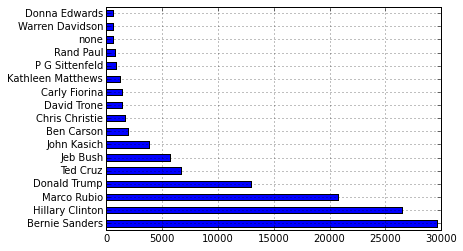

In [289]:
no_commas.candidate.value_counts()[no_commas.candidate.value_counts()>500].plot(kind='barh')

In [290]:
df.columns

Index(['wp_identifier', 'network', 'market', 'location', 'program', 'program_type', 'start_time', 'end_time', 'archive_id', 'embed_url', 'sponsor', 'sponsor_type', 'sponsor_affiliation', 'sponsor_affiliation_type', 'race', 'cycle', 'subject', 'candidate', 'type', 'message', 'market_count', 'date_created'], dtype='object')

In [293]:
example = "Sioux City, IA, USA"

def extract_state(value):
    if type(value) == type(np.NaN):
        return np.NaN
    else:
        return value.split(",")[1].strip(" ")

print(extract_state(example))
print(extract_state(np.NaN))

IA
nan


In [294]:
df.location.apply(type).value_counts()

<class 'str'>      154736
<class 'float'>        67
dtype: int64

In [299]:
df[df.location.apply(type) == type(5.0)]

,wp_identifier,network,market,location,program,program_type,start_time,end_time,archive_id,embed_url,...,sponsor_affiliation,sponsor_affiliation_type,race,cycle,subject,candidate,type,message,market_count,date_created
11395,277,WUVP,NaN,NaN,Durmiendo con Mi Jefe,not news,2016-03-07 10:28:00,2016-03-07 10:28:29,PolAd_None_7cbm3,https://archive.org/embed/PolAd_None_7cbm3,...,NaN,none,PA06,2016,NaN,none,campaign,unknown,3,2016-03-08 09:45:10
14032,284,WOIO,NaN,NaN,The Bold and the Beautiful,not news,2016-03-07 18:59:50,2016-03-07 19:00:20,PolAd_BernieSanders_o78yy,https://archive.org/embed/PolAd_BernieSanders_...,...,Bernie Sanders,supports,PRES,2016,NaN,Bernie Sanders,campaign,pro,12,2016-03-08 09:44:53
14038,284,WLWT,NaN,NaN,WLWT News 5 Today,news,2016-03-08 11:42:29,2016-03-08 11:42:59,PolAd_BernieSanders_o78yy,https://archive.org/embed/PolAd_BernieSanders_...,...,Bernie Sanders,supports,PRES,2016,NaN,Bernie Sanders,campaign,pro,12,2016-03-09 01:48:34
19605,301,WLWT,NaN,NaN,Access Hollywood,not news,2016-03-07 17:59:21,2016-03-07 17:59:51,PolAd_BernieSanders_q8l9l,https://archive.org/embed/PolAd_BernieSanders_...,...,Bernie Sanders,supports,PRES,2016,"Economy, Taxes, Women, Jobs",Bernie Sanders,campaign,pro,16,2016-03-08 09:44:58
19627,301,WEWS,NaN,NaN,News Channel 5 at Noon,news,2016-03-08 17:07:02,2016-03-08 17:07:32,PolAd_BernieSanders_q8l9l,https://archive.org/embed/PolAd_BernieSanders_...,...,Bernie Sanders,supports,PRES,2016,"Economy, Taxes, Women, Jobs",Bernie Sanders,campaign,pro,16,2016-03-09 01:48:39
19628,301,WLWT,NaN,NaN,WLWT News 5 at Noon,news,2016-03-08 17:27:52,2016-03-08 17:28:22,PolAd_BernieSanders_q8l9l,https://archive.org/embed/PolAd_BernieSanders_...,...,Bernie Sanders,supports,PRES,2016,"Economy, Taxes, Women, Jobs",Bernie Sanders,campaign,pro,16,2016-03-09 01:48:39
19629,301,WOIO,NaN,NaN,Jeopardy,not news,2016-03-08 00:59:23,2016-03-08 00:59:53,PolAd_BernieSanders_q8l9l,https://archive.org/embed/PolAd_BernieSanders_...,...,Bernie Sanders,supports,PRES,2016,"Economy, Taxes, Women, Jobs",Bernie Sanders,campaign,pro,16,2016-03-09 01:48:39
19630,301,WOIO,NaN,NaN,Jeopardy,not news,2016-03-08 00:35:24,2016-03-08 00:35:54,PolAd_BernieSanders_q8l9l,https://archive.org/embed/PolAd_BernieSanders_...,...,Bernie Sanders,supports,PRES,2016,"Economy, Taxes, Women, Jobs",Bernie Sanders,campaign,pro,16,2016-03-09 01:48:39
19631,301,WXIX,NaN,NaN,FOX19 Now,news,2016-03-08 11:52:25,2016-03-08 11:52:55,PolAd_BernieSanders_q8l9l,https://archive.org/embed/PolAd_BernieSanders_...,...,Bernie Sanders,supports,PRES,2016,"Economy, Taxes, Women, Jobs",Bernie Sanders,campaign,pro,16,2016-03-09 01:48:39
19632,301,WEWS,NaN,NaN,Live With Kelly and Michael,not news,2016-03-08 14:35:31,2016-03-08 14:36:01,PolAd_BernieSanders_q8l9l,https://archive.org/embed/PolAd_BernieSanders_...,...,Bernie Sanders,supports,PRES,2016,"Economy, Taxes, Women, Jobs",Bernie Sanders,campaign,pro,16,2016-03-09 01:48:39


In [300]:
df['state']=df.location.apply(extract_state)

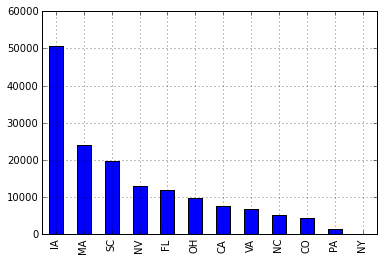

In [301]:
df.state.value_counts().plot(kind='bar')

In [302]:
df.set_index('start_time')['2015-12-25']

,wp_identifier,network,market,location,program,program_type,end_time,archive_id,embed_url,sponsor,...,sponsor_affiliation_type,race,cycle,subject,candidate,type,message,market_count,date_created,state
start_time,,,,,,,,,,,,,,,,,,,,,
2015-12-25 14:38:31,232,KCAU,SUX,"Sioux City, IA, USA",Good Morning America,news,2015-12-25 14:39:00,PolAd_MarcoRubio_s8ty9,https://archive.org/embed/PolAd_MarcoRubio_s8ty9,Marco Rubio for President,...,supports,PRES,2016,"Economy, Foreign Policy, Religion",Marco Rubio,campaign,pro,7,2016-03-02 06:37:56,IA
2015-12-25 16:14:51,232,FOXNEWSW,SF,"San Francisco, CA, USA",Americas News HQ,news,2015-12-25 16:15:20,PolAd_MarcoRubio_s8ty9,https://archive.org/embed/PolAd_MarcoRubio_s8ty9,Marco Rubio for President,...,supports,PRES,2016,"Economy, Foreign Policy, Religion",Marco Rubio,campaign,pro,7,2016-03-02 06:37:57,CA
2015-12-25 00:29:30,232,KCRG,CID,"Cedar Rapids, IA, USA",KCRG TV9 News at 6,news,2015-12-25 00:30:00,PolAd_MarcoRubio_s8ty9,https://archive.org/embed/PolAd_MarcoRubio_s8ty9,Marco Rubio for President,...,supports,PRES,2016,"Economy, Foreign Policy, Religion",Marco Rubio,campaign,pro,7,2016-03-02 06:37:57,IA
2015-12-25 16:50:38,232,WHO,DSM,"Des Moines, IA, USA",Today,news,2015-12-25 16:51:08,PolAd_MarcoRubio_s8ty9,https://archive.org/embed/PolAd_MarcoRubio_s8ty9,Marco Rubio for President,...,supports,PRES,2016,"Economy, Foreign Policy, Religion",Marco Rubio,campaign,pro,7,2016-03-02 06:37:57,IA
2015-12-25 23:50:16,232,KCCI,DSM,"Des Moines, IA, USA",CBS Evening News With Scott Pelley,news,2015-12-25 23:50:46,PolAd_MarcoRubio_s8ty9,https://archive.org/embed/PolAd_MarcoRubio_s8ty9,Marco Rubio for President,...,supports,PRES,2016,"Economy, Foreign Policy, Religion",Marco Rubio,campaign,pro,7,2016-03-02 06:37:57,IA
2015-12-25 03:52:16,232,KDSM,DSM,"Des Moines, IA, USA",13 News at Nine on FOX 17,news,2015-12-25 03:52:45,PolAd_MarcoRubio_s8ty9,https://archive.org/embed/PolAd_MarcoRubio_s8ty9,Marco Rubio for President,...,supports,PRES,2016,"Economy, Foreign Policy, Religion",Marco Rubio,campaign,pro,7,2016-03-02 06:37:57,IA
2015-12-25 10:18:11,232,KTIV,SUX,"Sioux City, IA, USA",Early Today,news,2015-12-25 10:18:40,PolAd_MarcoRubio_s8ty9,https://archive.org/embed/PolAd_MarcoRubio_s8ty9,Marco Rubio for President,...,supports,PRES,2016,"Economy, Foreign Policy, Religion",Marco Rubio,campaign,pro,7,2016-03-02 06:37:57,IA
2015-12-25 14:52:21,232,KGAN,CID,"Cedar Rapids, IA, USA",CBS This Morning,news,2015-12-25 14:52:51,PolAd_MarcoRubio_s8ty9,https://archive.org/embed/PolAd_MarcoRubio_s8ty9,Marco Rubio for President,...,supports,PRES,2016,"Economy, Foreign Policy, Religion",Marco Rubio,campaign,pro,7,2016-03-02 06:37:57,IA
2015-12-25 21:37:17,232,FBC,SF,"San Francisco, CA, USA",Strange Inheritance,not news,2015-12-25 21:37:46,PolAd_MarcoRubio_s8ty9,https://archive.org/embed/PolAd_MarcoRubio_s8ty9,Marco Rubio for President,...,supports,PRES,2016,"Economy, Foreign Policy, Religion",Marco Rubio,campaign,pro,7,2016-03-02 06:37:58,CA


In [303]:
from itertools import chain

x = set(chain.from_iterable(df.subject\
                        .map(str)\
                        .map(lambda x: x.split(",")).tolist()))

subjects = [item.strip(" ") for item in x if item != '']

In [304]:
subjects

['Energy',
 'Medicaid',
 'Voting Record',
 'Natural Disasters',
 'Foreign Policy',
 'Veterans',
 'Washington',
 'States',
 'Abortion',
 'Foreign Policy',
 'Housing',
 'Terrorism',
 'Income',
 'Guns',
 'Gays and Lesbians',
 'Legal Issues',
 'Deficit',
 'Government Efficiency',
 'Congress',
 'Federal Budget',
 'Human Rights',
 'Nuclear',
 'Gay and Lesbians',
 'Women',
 'Economy',
 'Disability',
 'Campaign Finance',
 'Candidate Biography',
 'Debt',
 'Diversity',
 'Bipartisanship',
 'Education',
 'China',
 'Bankruptcy',
 'Candiate biography',
 'Families',
 'Legal issues',
 'States',
 'Families',
 'Terrorism',
 'Women',
 'Iraq',
 'China',
 'Small Business',
 'Negative Campaigning',
 'Income',
 'Veterans',
 'Homeland Security',
 'immigration',
 'Social Security',
 'Elections',
 'Taxes',
 'Candiate Biography',
 'Israel',
 'Government regulation',
 'Environment',
 'Immigration',
 'Job Accomplishments',
 'Taxes',
 'Criminal Justice',
 'Government regulation',
 'Government Regulation',
 'nan',
 

In [305]:
for subject in subjects:
    column_name = "is_about_" + subject
    print(column_name)
    df[column_name] = df.subject.map(lambda x: subject in str(x))

is_about_Energy
is_about_Medicaid
is_about_Voting Record
is_about_Natural Disasters
is_about_Foreign Policy
is_about_Veterans
is_about_Washington
is_about_States
is_about_Abortion
is_about_Foreign Policy
is_about_Housing
is_about_Terrorism
is_about_Income
is_about_Guns
is_about_Gays and Lesbians
is_about_Legal Issues
is_about_Deficit
is_about_Government Efficiency
is_about_Congress
is_about_Federal Budget
is_about_Human Rights
is_about_Nuclear
is_about_Gay and Lesbians
is_about_Women
is_about_Economy
is_about_Disability
is_about_Campaign Finance
is_about_Candidate Biography
is_about_Debt
is_about_Diversity
is_about_Bipartisanship
is_about_Education
is_about_China
is_about_Bankruptcy
is_about_Candiate biography
is_about_Families
is_about_Legal issues
is_about_States
is_about_Families
is_about_Terrorism
is_about_Women
is_about_Iraq
is_about_China
is_about_Small Business
is_about_Negative Campaigning
is_about_Income
is_about_Veterans
is_about_Homeland Security
is_about_immigration
is_abou

In [308]:
marco = df[df.candidate == 'Hillary Clinton']

In [309]:
marco.head()

,wp_identifier,network,market,location,program,program_type,start_time,end_time,archive_id,embed_url,...,is_about_Marriage,is_about_Climate Change,is_about_Police,is_about_Military,is_about_D.C.,is_about_Washington D.C.,is_about_Retirement,is_about_Financial Regulation,is_about_military,is_about_jobs
4367,245,WOI,DSM,"Des Moines, IA, USA",Local 5 News Midday,news,2016-01-06 17:16:35,2016-01-06 17:17:08,PolAd_HillaryClinton_80dka,https://archive.org/embed/PolAd_HillaryClinton...,...,False,False,False,False,False,False,False,False,False,False
4368,245,WHO,DSM,"Des Moines, IA, USA",Channel 13 News at Noon,news,2015-12-28 18:59:37,2015-12-28 19:00:09,PolAd_HillaryClinton_80dka,https://archive.org/embed/PolAd_HillaryClinton...,...,False,False,False,False,False,False,False,False,False,False
4369,245,KCCI,DSM,"Des Moines, IA, USA",KCCI 8 News at Ten,news,2015-12-29 04:20:15,2015-12-29 04:20:47,PolAd_HillaryClinton_80dka,https://archive.org/embed/PolAd_HillaryClinton...,...,False,False,False,False,False,False,False,False,False,False
4370,245,KDSM,DSM,"Des Moines, IA, USA",The Big Bang Theory,not news,2015-12-30 23:58:43,2015-12-30 23:59:15,PolAd_HillaryClinton_80dka,https://archive.org/embed/PolAd_HillaryClinton...,...,False,False,False,False,False,False,False,False,False,False
4371,245,KGAN,CID,"Cedar Rapids, IA, USA",The NFL Today,not news,2015-12-27 17:57:51,2015-12-27 17:58:24,PolAd_HillaryClinton_80dka,https://archive.org/embed/PolAd_HillaryClinton...,...,False,False,False,False,False,False,False,False,False,False


In [311]:
is_about_cols = [col for col in marco.columns if col.startswith("is_about")]

In [313]:
marco_subj = marco[is_about_cols].sum()

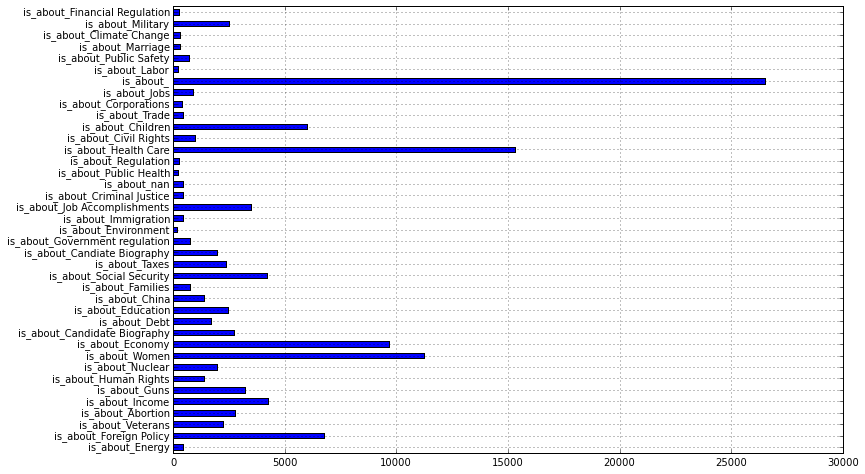

In [315]:
marco_subj[marco_subj > 50].plot(kind='barh', figsize=(12,8))